# Down Syndrome Prediction from Mice Behaviour on Subset of Protein

In [52]:
# importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Que-1
Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

In [53]:
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv" # storing data path
df1 = pd.read_csv(url)        # reads data from given path
df1

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [54]:
df1.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


# Que-2
## a) 
To find useful variables, we will find the correlation between different independent features so that we can remove highly correlated features/variables. Then we remove those features which have many null values and then remove those features which have low variance

In [55]:
X = df1.drop(['Genotype', 'Treatment_Behavior'], axis = 1) # feature matrix
y_1 = df1['Genotype']                                      # first target variable   
y_2 = df1['Treatment_Behavior']                            # second target variable

In [56]:
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [57]:
y_1

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
757     Ts65Dn
758     Ts65Dn
759     Ts65Dn
760     Ts65Dn
761     Ts65Dn
Name: Genotype, Length: 762, dtype: object

In [58]:
y_2

0      Memantine_C/S
1      Memantine_C/S
2      Memantine_C/S
3      Memantine_C/S
4      Memantine_C/S
           ...      
757       Saline_S/C
758       Saline_S/C
759       Saline_S/C
760       Saline_S/C
761       Saline_S/C
Name: Treatment_Behavior, Length: 762, dtype: object

In [59]:
import seaborn as sns   # for heat plot

cor_coeff = X.corr()    # calculates correlation coefficient
cor_coeff

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.250262,-0.150564,-0.358480,-0.224427,-0.035929,-0.406055,-0.324198,-0.518361,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.331306,-0.247760,-0.299066,-0.300170,0.039384,-0.354554,-0.403525,-0.558266,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.279752,-0.210969,0.070504,-0.265185,0.454025,-0.207555,-0.247121,-0.331191,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.434723,-0.369966,0.227674,-0.364487,0.486483,-0.253118,-0.287997,-0.404977,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.486259,-0.321165,0.215495,-0.426562,0.377628,-0.292016,-0.326056,-0.468892,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.044640,0.020941,0.392329,-0.010451,1.000000,0.131303,0.093264,0.001912,0.273142
H3AcK18_N,-0.406055,-0.354554,-0.207555,-0.253118,-0.292016,0.317508,0.256479,0.229161,0.176392,-0.234061,...,0.121694,0.406723,0.323245,0.224768,0.216137,0.131303,1.000000,0.355167,0.744541,-0.263963
EGR1_N,-0.324198,-0.403525,-0.247121,-0.287997,-0.326056,0.313131,0.366838,0.137520,-0.124001,-0.199574,...,0.417847,0.831734,0.847950,0.291173,0.744911,0.093264,0.355167,1.000000,0.774110,-0.487640
H3MeK4_N,-0.518361,-0.558266,-0.331191,-0.404977,-0.468892,0.372945,0.378236,0.080201,-0.004925,-0.277739,...,0.268944,0.717214,0.688121,0.307902,0.594812,0.001912,0.744541,0.774110,1.000000,-0.452618


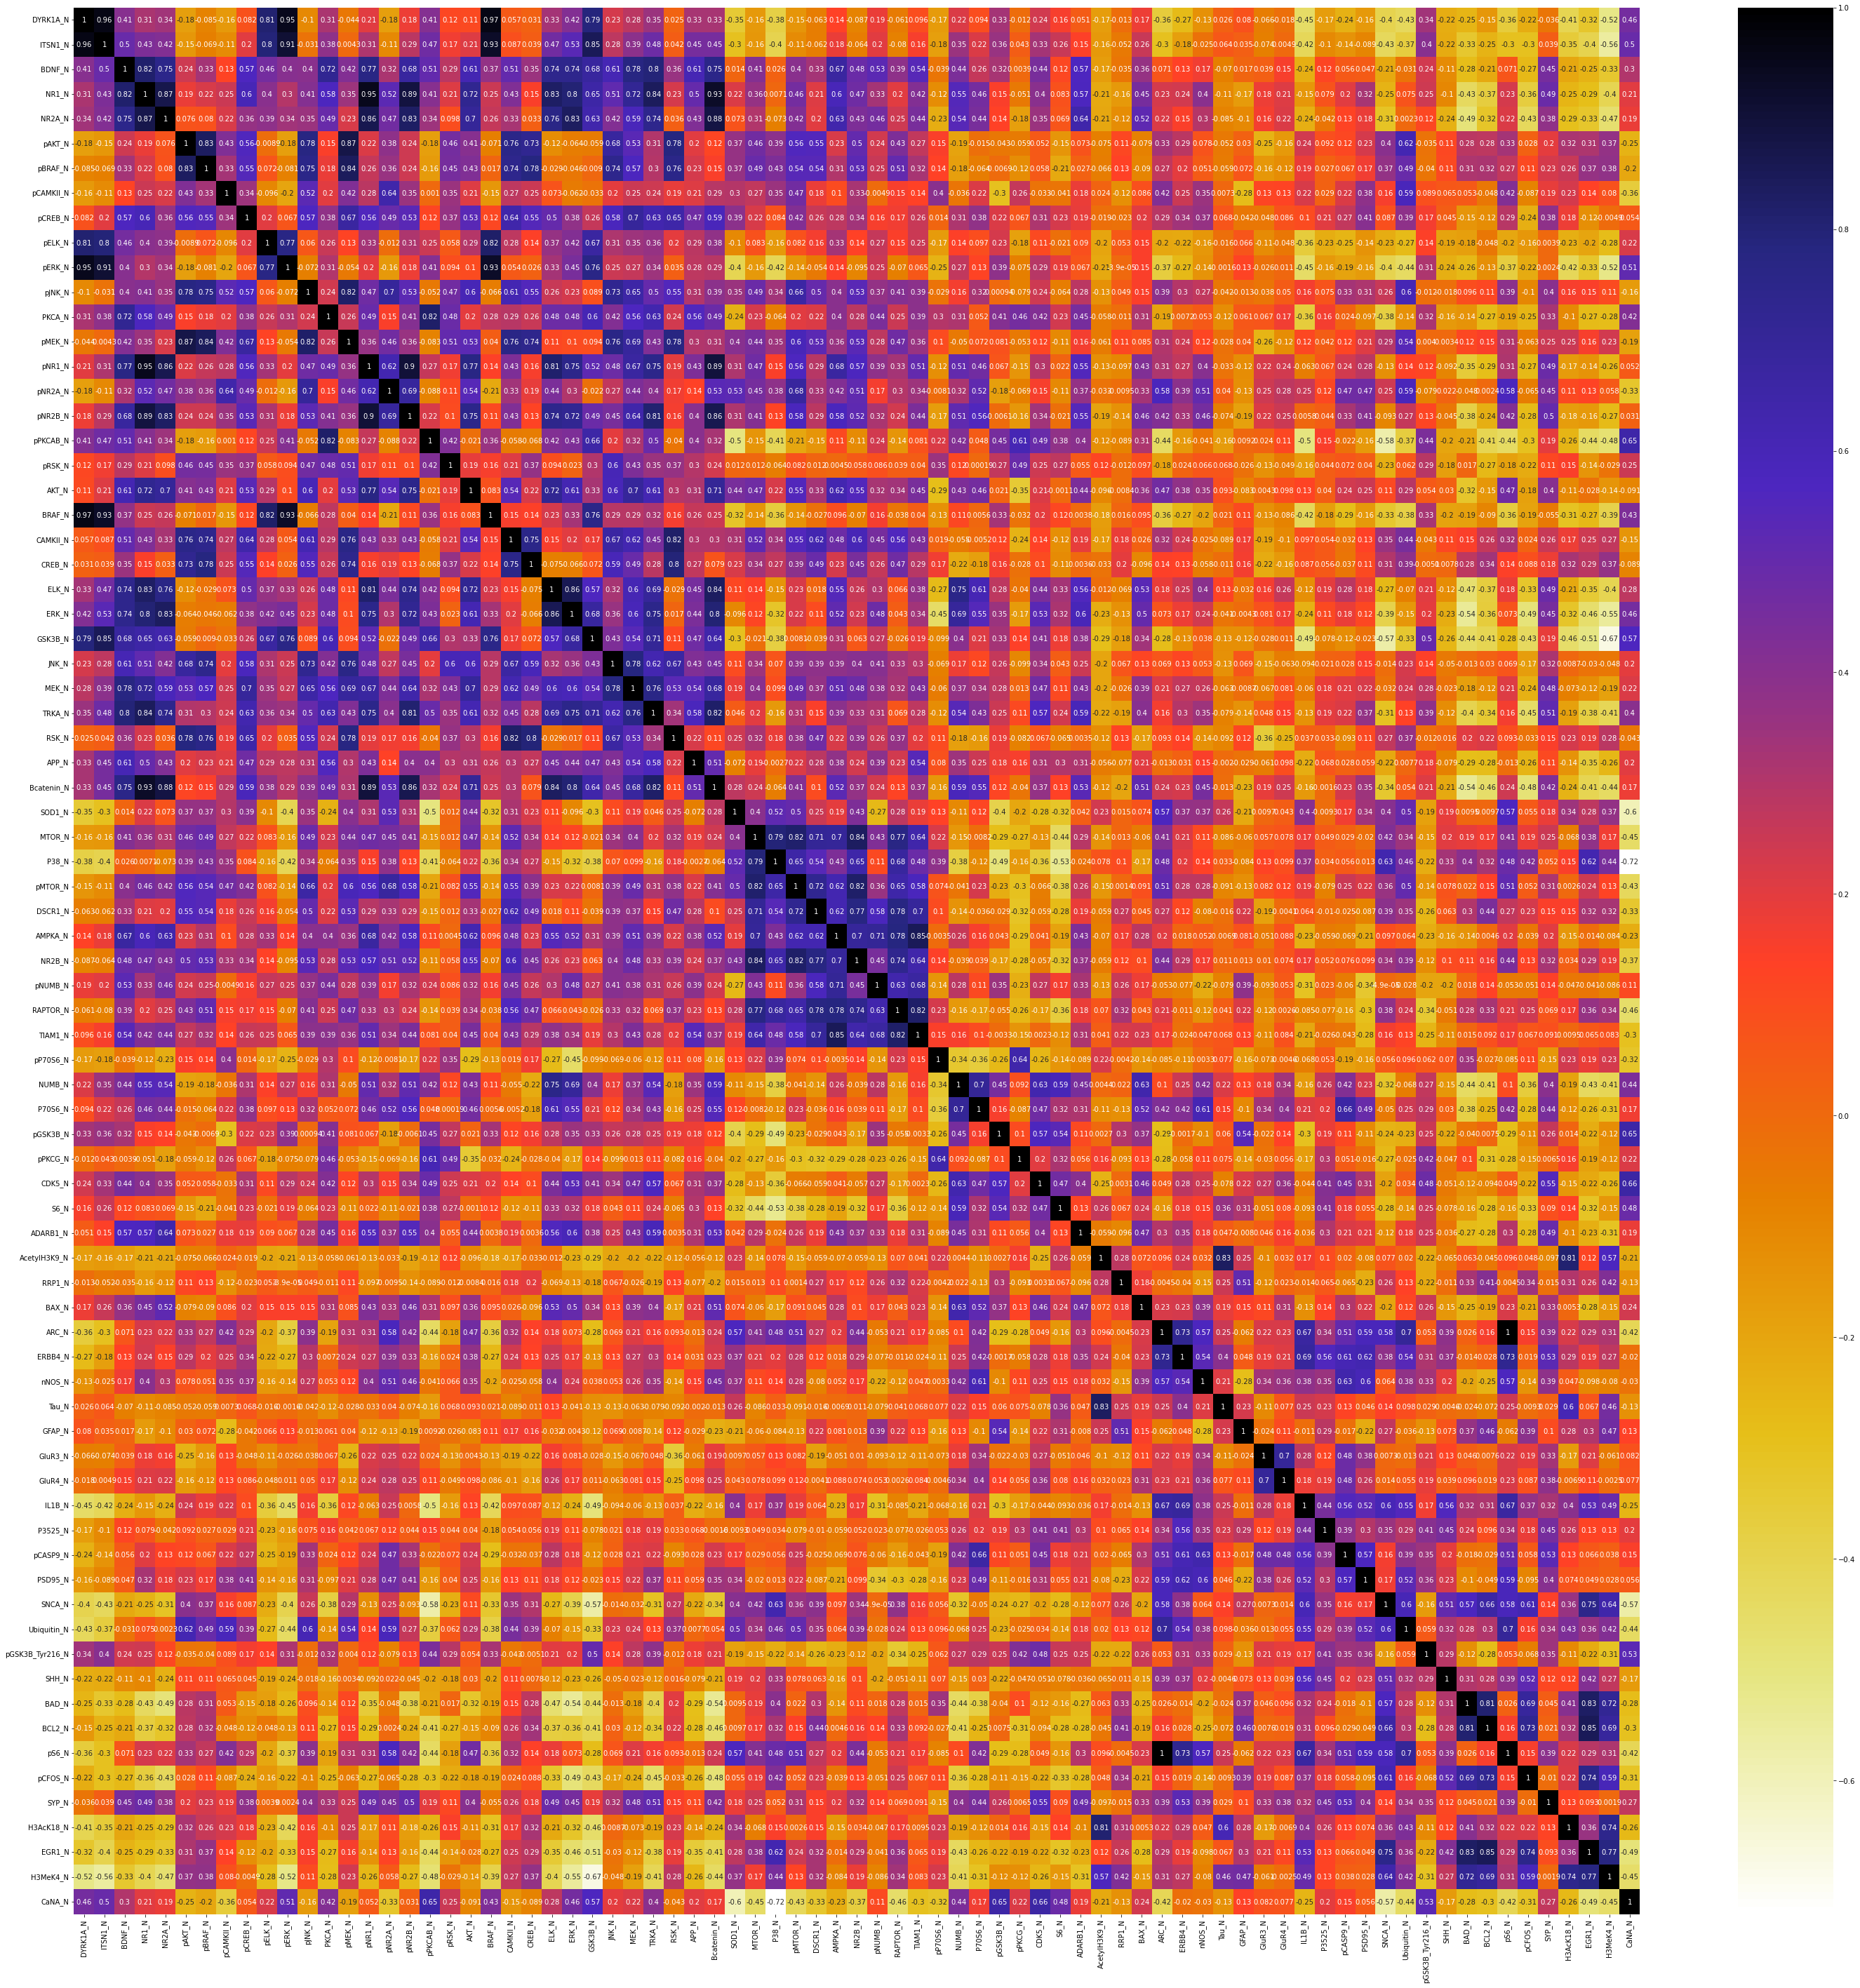

In [60]:
plt.figure(figsize = (50, 50))
sns.heatmap(cor_coeff, annot = True, cmap = plt.cm.CMRmap_r)   # ploting correlation between features using heat map
plt.show()

In [61]:
def correlation(data_matrix, threshold):     # define function to get highly correlated features
    correlated_features = set()              # empty set
    correlation_matrix = data_matrix.corr()  # correlation coefficient
    for i in range(len(correlation_matrix)): # looping throgh different values
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:   # value greater than threshold 
                feature_name = correlation_matrix.columns[i]     # add to set
                correlated_features.add(feature_name)
    return correlated_features

In [62]:
corr_features = correlation(X, 0.9)
print('Number of highly correlated features:', len(corr_features))
print(corr_features)

Number of highly correlated features: 7
{'pNR1_N', 'pNR2B_N', 'BRAF_N', 'pERK_N', 'Bcatenin_N', 'pS6_N', 'ITSN1_N'}


In [63]:
corr_features.remove('pERK_N')
print(corr_features)

{'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N', 'pS6_N', 'ITSN1_N'}


In [64]:
X = X.drop(corr_features, axis = 1)  # dropped 6 out of 7 highly correlated features
X

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,...,0.831557,0.188852,0.122652,NaN,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,...,0.849270,0.200404,0.116682,NaN,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,...,0.846709,0.193685,0.118508,NaN,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,...,0.833277,0.192112,0.132781,NaN,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,...,0.878668,0.205604,0.129954,NaN,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.467915,...,1.001404,0.216128,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.476240,...,1.043402,0.209717,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.442727,...,0.948795,0.211279,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.432371,...,0.995884,0.197436,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [65]:
d = df1['Genotype'].isna().sum()
d

0

In [66]:
d1 = df1['Treatment_Behavior'].isna().sum()
d1

0

In [67]:
# Now lets count the null values in the columns of feature matrix X
null_count = X.isna().sum()
print(null_count[0:35])
print(null_count[35:72])
print(len(null_count))

DYRK1A_N      0
BDNF_N        0
NR1_N         0
NR2A_N        0
pAKT_N        0
pBRAF_N       0
pCAMKII_N     0
pCREB_N       0
pELK_N        0
pERK_N        0
pJNK_N        0
PKCA_N        0
pMEK_N        0
pNR2A_N       0
pPKCAB_N      0
pRSK_N        0
AKT_N         0
CAMKII_N      0
CREB_N        0
ELK_N        15
ERK_N         0
GSK3B_N       0
JNK_N         0
MEK_N         4
TRKA_N        0
RSK_N         0
APP_N         0
SOD1_N        0
MTOR_N        0
P38_N         0
pMTOR_N       0
DSCR1_N       0
AMPKA_N       0
NR2B_N        0
pNUMB_N       0
dtype: int64
RAPTOR_N             0
TIAM1_N              0
pP70S6_N             0
NUMB_N               0
P70S6_N              0
pGSK3B_N             0
pPKCG_N              0
CDK5_N               0
S6_N                 0
ADARB1_N             0
AcetylH3K9_N         0
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N      

In [68]:
# dropping those features which have more than 20 null values

def drop_feat(feature_matrix, threshold):       # defining function to drop features
    null_count = feature_matrix.isna().sum()    # counts total null values
    null_feat = set()
    for i in range(len(null_count)):            # going through different columns
        if null_count[i] > threshold:           # comparing with threshold
            null_feat.add(feature_matrix.columns[i])  # add those features having more than threshold null values 
        
    print('Features with more than', threshold, 'null values:', null_feat)
    feature_matrix = feature_matrix.drop(null_feat, axis = 1)   # drop all those features
    print('Feature matrix after removing above features:')
    return feature_matrix
            
X = drop_feat(X, 20)
X


Features with more than 20 null values: {'pCFOS_N', 'H3MeK4_N', 'EGR1_N', 'H3AcK18_N', 'BAD_N', 'BCL2_N'}
Feature matrix after removing above features:


,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,...,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,SYP_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,...,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.427099,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,...,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.441581,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,...,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.435777,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,...,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.391691,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,...,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.467915,...,0.498420,0.311337,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.441207,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.476240,...,0.532683,0.315762,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.444913,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.442727,...,0.474109,0.308615,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.422789,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.432371,...,0.528104,0.327140,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.459901,1.543274


In [69]:
# Now we will calculate the variance of different features and remove those features which are having very low(0.001) variance
def drop_low_var_feat(feature_matrix, threshold):   # function to calculate variance of the features
    var_feat = feature_matrix.var()                 # gives varience of each columns
    low_var_feat = set()
    for i in range(len(var_feat)):           # going through each values
        if var_feat[i] < threshold:          # compare the values
            low_var_feat.add(feature_matrix.columns[i]) # add those values having low variance
    print('Features with less than', threshold, 'variance:', low_var_feat)
    feature_matrix = feature_matrix.drop(low_var_feat, axis = 1) # drop low varience feature
    print('Feature matrix after removing above features:')
    return feature_matrix   
 
X = drop_low_var_feat(X, 0.001)
X

Features with less than 0.001 variance: {'GFAP_N', 'pCREB_N', 'CREB_N', 'pGSK3B_N', 'NUMB_N', 'GluR4_N', 'SNCA_N', 'nNOS_N', 'ARC_N', 'RSK_N', 'BAX_N', 'ERBB4_N', 'pBRAF_N', 'P3525_N', 'SHH_N'}
Feature matrix after removing above features:


,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,RRP1_N,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,2.373744,1.750936,0.687906,0.306382,0.402698,...,0.159102,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,2.292150,1.596377,0.695006,0.299051,0.385987,...,0.158129,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,2.283337,1.561316,0.677348,0.291276,0.381002,...,0.148696,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,2.152301,1.595086,0.583277,0.296729,0.377087,...,0.166112,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,2.134014,1.504230,0.550960,0.286961,0.363502,...,0.160687,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,3.208804,1.218951,0.467915,0.317851,0.306417,...,0.165497,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,3.384350,1.250487,0.476240,0.329786,0.323939,...,0.170269,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,3.006364,1.248727,0.442727,0.354545,0.324182,...,0.177258,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,2.948221,1.177527,0.432371,0.325819,0.310497,...,0.171684,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274


## b)
Yes, There are some variables which are highly correlated.  As i have calculated above there are total 7 independent features having correlation coefficient greater than 0.9, as shown below.

{'pS6_N', 'BRAF_N', 'pNR1_N', 'ITSN1_N', 'pERK_N', 'Bcatenin_N', 'pNR2B_N'}

I have arbitrarily chosen one of them and discarded 6 variables.


## c)

In [70]:
df1.Genotype.value_counts()

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

### Genotype is the case of binary classification. This is the balanced class because, Control class has 435/762 = 0.57 i.e. 57% contribution and Ts65Dn calss has 327/762 = 0.43 i.e. 43% contribution to overall data samples.  Binary Classes are balanced when each class has approximately 50% contribution.   

In [71]:
df1.Treatment_Behavior.value_counts()

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

### Treatment_Behavior is the classification task having 4 classes. This will be balanced class if each class has contribution of approximately 25%. Saline_S/C has 132/762 = 0.173 i.e. 17.3%, Saline_C/S has 180/762 = 23.6% and both Memantine_C/S, Memantine_S/C have 225/762 = 29.5% contribution to overall data samples.  

# Que-3

There are several method to deal with missing values in a data set, like SimpleImputer and IterativeImputer. In multivariate feature imputation, at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. The process is repeated for each feature. 

In [72]:
# import relevant libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_df1 = X 
impute = IterativeImputer(max_iter=10, random_state=20) # calling imputer
df2 = impute.fit_transform(impute_df1)      # imputes the feature matrix 
print(df2)
print(df2.shape)

[[0.50364388 0.4301753  2.81632854 ... 0.8315565  0.4270992  1.67565235]
 [0.51461708 0.41177034 2.78951404 ... 0.84927041 0.44158129 1.74360965]
 [0.50918309 0.41830878 2.68720107 ... 0.8467087  0.43577688 1.92642659]
 ...
 [0.38218182 0.31854545 2.072      ... 0.94879483 0.42278861 1.43351401]
 [0.3656217  0.29799225 2.00493131 ... 0.99588429 0.45990122 1.54327375]
 [0.36560487 0.30153901 2.06281317 ... 1.03148193 0.42422792 1.52011013]]
(762, 50)


In [73]:
null_v = np.isnan(df2)     # checking the null values
print(null_v)              # gives false that means no null values
print('Total null values:', null_v.sum()) # prints total null values in nd array

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Total null values: 0


In [74]:
col = X.columns                        # creats list of columns name
df3 = pd.DataFrame(df2, columns = col) # creats dataframe 
df3

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,RRP1_N,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,2.373744,1.750936,0.687906,0.306382,0.402698,...,0.159102,0.125190,0.228043,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,2.292150,1.596377,0.695006,0.299051,0.385987,...,0.158129,0.134275,0.238073,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,2.283337,1.561316,0.677348,0.291276,0.381002,...,0.148696,0.132560,0.244817,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,2.152301,1.595086,0.583277,0.296729,0.377087,...,0.166112,0.123210,0.234947,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,2.134014,1.504230,0.550960,0.286961,0.363502,...,0.160687,0.136838,0.255528,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,3.208804,1.218951,0.467915,0.317851,0.306417,...,0.165497,0.313268,0.209810,0.498420,1.622850,2.236925,1.136276,1.001404,0.441207,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,3.384350,1.250487,0.476240,0.329786,0.323939,...,0.170269,0.322263,0.204358,0.532683,1.657617,2.274556,1.154191,1.043402,0.444913,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,3.006364,1.248727,0.442727,0.354545,0.324182,...,0.177258,0.277477,0.193057,0.474109,1.504094,2.107139,1.195479,0.948795,0.422789,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,2.948221,1.177527,0.432371,0.325819,0.310497,...,0.171684,0.291863,0.200024,0.528104,1.568203,2.212959,1.213194,0.995884,0.459901,1.543274


In [75]:
null_val = df3.isna().sum().sum()      # counting total null values in the dataframe
print('Total null values in new dataframe:', null_val)  # gives null values

Total null values in new dataframe: 0


# Que-4


The confusion Matrix gives a comparison between actual and predicted values. The confusion matrix is a N x N matrix, where N is the number of classes or outputs.
The confusion Matrix allows us to measure Recall and Precision, which, along with Accuracy and the AUC-ROC curve, are the metrics used to measure the performance of ML models.
The F1 score is the weighted average of precision and recall. For unbalanced data set F1 score is more useful than accuracy.
Therefore for binary class classification(balanced class), we will use accuracy and for four class classification(unbalanced class), we will use F1 score.

Ref

# Que-5 
## Using five-fold cross-validation to find the reasonable hyper-parameter settings.

## a) Linear SVM with regularization as hyperparameter

In [76]:
# importing the relevant libraries
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Specifying Independent and Dependent Variables
X = df3     # independent variables
y_1 = y_1   # dependent variable(binary classification)
y_2 = y_2   # depnedent variable(4 class classification)

In [78]:
# Encoding the target variables as 0,1,2,3
y_1 = y_1.replace({'Control':0, 'Ts65Dn':1}) 
y_2 = y_2.replace({'Memantine_C/S':0, 'Memantine_S/C':1, 'Saline_C/S':2, 'Saline_S/C':3})
print(X.shape)
print(y_1.shape)
print(y_2.shape)

(762, 50)
(762,)
(762,)


### Binary Classification

In [79]:
# Splitting the data into train and test set
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2, random_state = 81)

In [80]:
print(X_train.shape)
print(y_1_train.shape)
print(X_test.shape)
print(y_1_test.shape)

(609, 50)
(609,)
(153, 50)
(153,)


In [81]:
# Building Linear SVM Classifier
lsvm = LinearSVC()

# Initializing GridSearchCV() object and fitting it with hyperparameters
reg = [{'C': [5, 10, 20, 40, 80, 100, 500]}]  # regularization parameter value
lsvm_clf = GridSearchCV(lsvm, reg, cv = 5, scoring='accuracy')  # calling grid searchCV and pass parameter values
lsvm_clf.fit(X_train, y_1_train)    # fitting the model 


print('Reasonable hyperparameter value:', lsvm_clf.best_params_)
print('Score of the model using best hyperparameter:', lsvm_clf.best_score_)

C_opt = lsvm_clf.best_params_   # extracting the optimum hyper parameters
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81) # calling the model using optimum hyperparameters
lsvm_clf_model.fit(X_train, y_1_train)         # fitting the model
y_1_pred = lsvm_clf_model.predict(X_test)     # predicting the output
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))


Reasonable hyperparameter value: {'C': 5}
Score of the model using best hyperparameter: 0.9589757485435577
The classification report for model:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.96      0.95      0.95        55

    accuracy                           0.97       153
   macro avg       0.97      0.96      0.96       153
weighted avg       0.97      0.97      0.97       153



### Four Class Classification

In [82]:
# Splitting the data into train and test set
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size = 0.2, random_state = 81)

In [83]:
# Building Linear SVM Classifier
lsvm = LinearSVC()

# Initializing GridSearchCV() object and fitting it with hyperparameters
reg = [{'C': [5, 10, 20, 40, 80, 100, 500]}]  # regularization parameter value
lsvm_clf = GridSearchCV(lsvm, reg, cv = 5, scoring='accuracy')  # calling grid searchCV and pass parameter values
lsvm_clf.fit(X_train, y_2_train)   # fitting the model 
 
print('Reasonable hyperparameter value:', lsvm_clf.best_params_)
print('Score of the model using above hyperparameter:', lsvm_clf.best_score_) 


C_opt = lsvm_clf.best_params_   # extracting the optimum hyper parameters
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81)  # calling the model using optimum hyperparameters
lsvm_clf_model.fit(X_train, y_2_train)   # fitting the model
y_2_pred = lsvm_clf_model.predict(X_test) # predicting the output
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))


Reasonable hyperparameter value: {'C': 20}
Score of the model using above hyperparameter: 0.9687982658176398
The classification report for model:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        42
           2       0.94      0.97      0.96        34
           3       1.00      1.00      1.00        34

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153



## b) RBF kernel SVM with kernel width and regularization as hyperparameters

### Binary Classification

In [84]:
# Splitting the data into train and test set
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2, random_state = 81)

# Building RBF kernel SVM Classifier
param_grid = {'kernel': ['rbf'], 'C': [5, 10, 20, 40, 80, 100, 500], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  # different hyperparameter values
rbf_k_svm = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, scoring = 'accuracy')  # calling grid searchCV and pass parameter values
rbf_k_svm.fit(X_train, y_1_train)    # fitting the model 
print('Reasonable hyperparameter value:', rbf_k_svm.best_params_)
print('Score of the model using above hyperparameter:', rbf_k_svm.best_score_)


C_opt = rbf_k_svm.best_params_    # extracting the optimum hyper parameters
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81) # calling the model using optimum hyperparameter
rbf_k_svm_model.fit(X_train, y_1_train)    # fitting the model
y_1_pred = rbf_k_svm_model.predict(X_test)   # predicting the output
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))



Reasonable hyperparameter value: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
Score of the model using above hyperparameter: 0.9983606557377049
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.96      1.00      0.98        55

    accuracy                           0.99       153
   macro avg       0.98      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



### Four Class Classification

In [85]:
# Splitting the data into train and test set
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size = 0.2, random_state = 81)

# Building RBF kernel SVM Classifier
param_grid = {'kernel': ['rbf'], 'C': [5, 10, 20, 40, 80, 100, 500], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}   # different hyperparameter values
rbf_k_svm = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, scoring = 'accuracy')  # calling grid searchCV and pass parameter values
rbf_k_svm.fit(X_train, y_2_train)
print('Reasonable hyperparameter value:', rbf_k_svm.best_params_)
print('Score of the model using above hyperparameter:', rbf_k_svm.best_score_)

C_opt = rbf_k_svm.best_params_    # extracting the optimum hyper parameters
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81)  # calling the model using optimum hyperparameter
rbf_k_svm_model.fit(X_train, y_2_train)    # fitting the model
y_2_pred = rbf_k_svm_model.predict(X_test) # predicting the output
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))


Reasonable hyperparameter value: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       1.00      1.00      1.00        42
           2       0.89      1.00      0.94        34
           3       1.00      1.00      1.00        34

    accuracy                           0.97       153
   macro avg       0.97      0.98      0.97       153
weighted avg       0.98      0.97      0.97       153



## c) Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)

### Binary Classification

In [86]:
# Splitting the data into train and test set
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2, random_state = 81)

# Building NN Classifier
param_grid = {'alpha': [0.5, 0.1, 0.01, 0.001], 'hidden_layer_sizes': [(100,), (200,), (300,), (400,)]}   # different hyperparameter values
mlp_clf = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)     # define estimator
nn_clf = GridSearchCV(mlp_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)    # calling grid searchCV and pass parameter values
nn_clf.fit(X_train, y_1_train)

print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)


opt_param = nn_clf.best_params_   # extracting the optimum hyper parameters
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)   # calling the model using optimum hyperparameter
nn_clf_model.fit(X_train, y_1_train)     # fitting the model
y_1_pred = nn_clf_model.predict(X_test)  # predicting the output
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))


Reasonable hyperparameter value: {'alpha': 0.01, 'hidden_layer_sizes': (400,)}
Score of the model using above hyperparameter: 0.9540170708576075
The classification report for model:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.98      0.85      0.91        55

    accuracy                           0.94       153
   macro avg       0.95      0.92      0.93       153
weighted avg       0.94      0.94      0.94       153



### Four Class Classification

In [87]:
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size = 0.2, random_state = 81)

# Building NN Classifier
param_grid = {'alpha': [0.5, 0.1, 0.01, 0.001], 'hidden_layer_sizes': [(100,), (200,), (300,), (400,)]}  # different hyperparameter values
mlp_clf = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)    # define estimator
nn_clf = GridSearchCV(mlp_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)  # calling grid searchCV and pass parameter values
nn_clf.fit(X_train, y_2_train)

print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)

opt_param = nn_clf.best_params_   # extracting the optimum hyper parameters
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)   # calling the model and passing optimum hyperparameter
nn_clf_model.fit(X_train, y_2_train)   # fitting the model
y_2_pred = nn_clf_model.predict(X_test) # predicting the output
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))

Reasonable hyperparameter value: {'alpha': 0.01, 'hidden_layer_sizes': (400,)}
Score of the model using above hyperparameter: 0.9836065573770492
The classification report for model:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        43
           1       1.00      1.00      1.00        42
           2       0.81      0.74      0.77        34
           3       1.00      1.00      1.00        34

    accuracy                           0.90       153
   macro avg       0.90      0.90      0.90       153
weighted avg       0.90      0.90      0.90       153



## d) Random forest (max tree depth, max number of variables per node) 

### Binary Classification

In [88]:
# Splitting the data into train and test set
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2, random_state = 81)

# Building Random Forest Classifier
rf = RandomForestClassifier()   # initialize estimator
param_grid = {'max_depth':[2,3,4,5,6], 'max_features':[10,20,30,40,50]}  # different hyperparameter values
rf_clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')  # calling grid searchCV and pass parameter values
rf_clf.fit(X_train, y_1_train)    # fitting the model
print('Reasonable hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_   # extracting the optimum hyper parameters

rf_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features'])  # calling the model and passing optimum hyperparameter
rf_clf_model.fit(X_train, y_1_train)    # fitting the model
y_1_pred = rf_clf_model.predict(X_test)   # predicting the output   
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_1_test, y_1_pred))


Reasonable hyperparameter values are: {'max_depth': 6, 'max_features': 10}
Score of the model using above hyperparameter: 0.9721040509416069
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.98      0.98      0.98        55

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



### Four Class Classificaton

In [89]:
# Splitting the data into train and test set
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size = 0.2, random_state = 81)

# Building Random Forest Classifier
rf = RandomForestClassifier()
param_grid = {'max_depth':[2,3,4,5,6], 'max_features':[10,20,30,40,50]}
rf_clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
rf_clf.fit(X_train, y_2_train)
print('Reasonable hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_  # optimum hyperparameter

rf_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features']) # calling the model and passing optimum hyperparameter
rf_clf_model.fit(X_train, y_2_train)     # fitting the model
y_2_pred = rf_clf_model.predict(X_test)  # predicting the output
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_2_test, y_2_pred))

Reasonable hyperparameter values are: {'max_depth': 6, 'max_features': 10}
Score of the model using above hyperparameter: 0.9589351036444926
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.93      1.00      0.97        42
           2       0.87      1.00      0.93        34
           3       1.00      0.94      0.97        34

    accuracy                           0.95       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153



# Que-6 
## Feature importance for each model to see if the same proteins are important for each model.

# a)

Text(0.5, 1.0, 'Linear SVM')

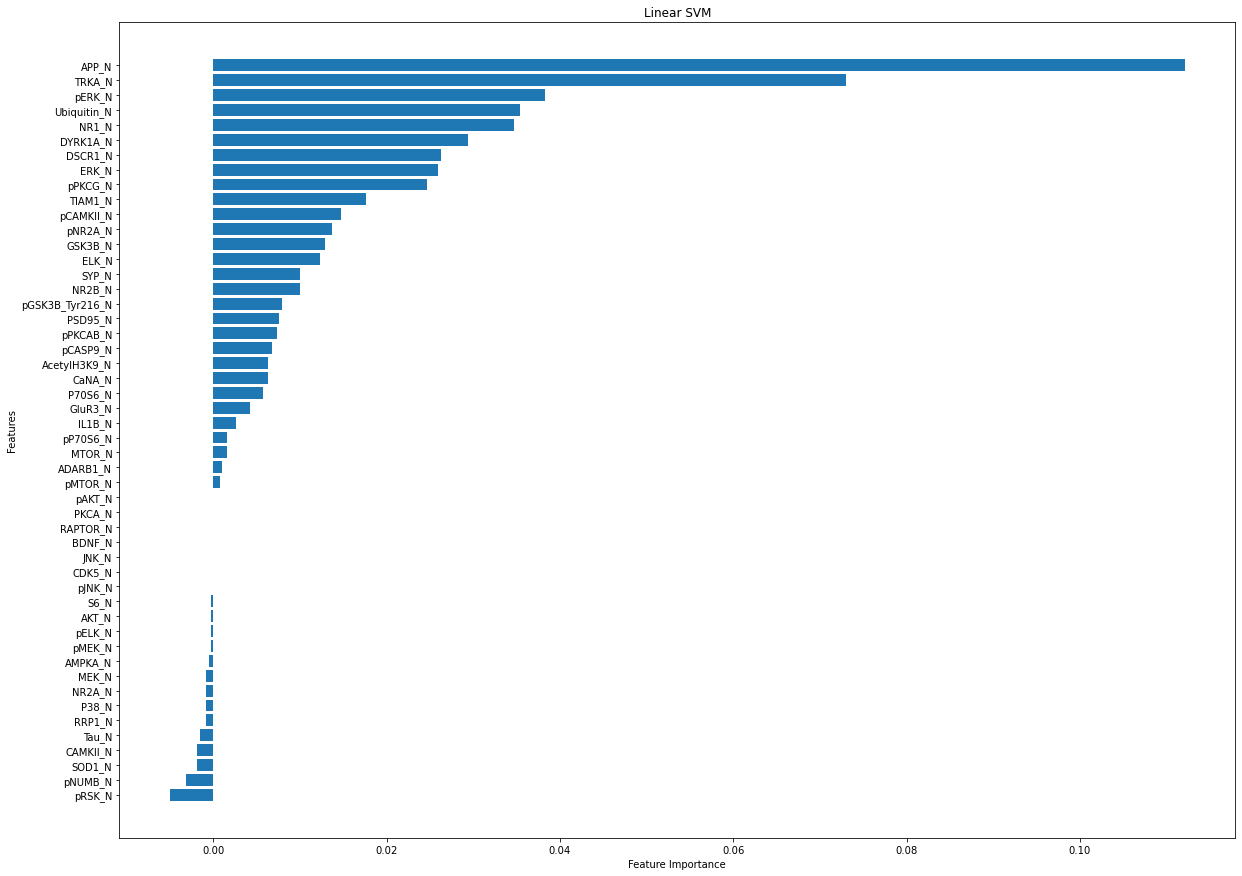

In [90]:
from sklearn.inspection import permutation_importance  # Required library
%matplotlib inline

svc =  SVC(kernel='linear')   # model 
svc.fit(X, y_1) # fit the model

perm_importance = permutation_importance(svc, X, y_1) # gives importance matrix

feature_names = X.columns  
features = np.array(feature_names) # convert the columns into array
plt.figure(figsize = (20, 15))
sorted_idx = perm_importance.importances_mean.argsort()  # sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])  # plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Linear SVM")

# b)

Text(0.5, 1.0, 'RBF Kernel SVM')

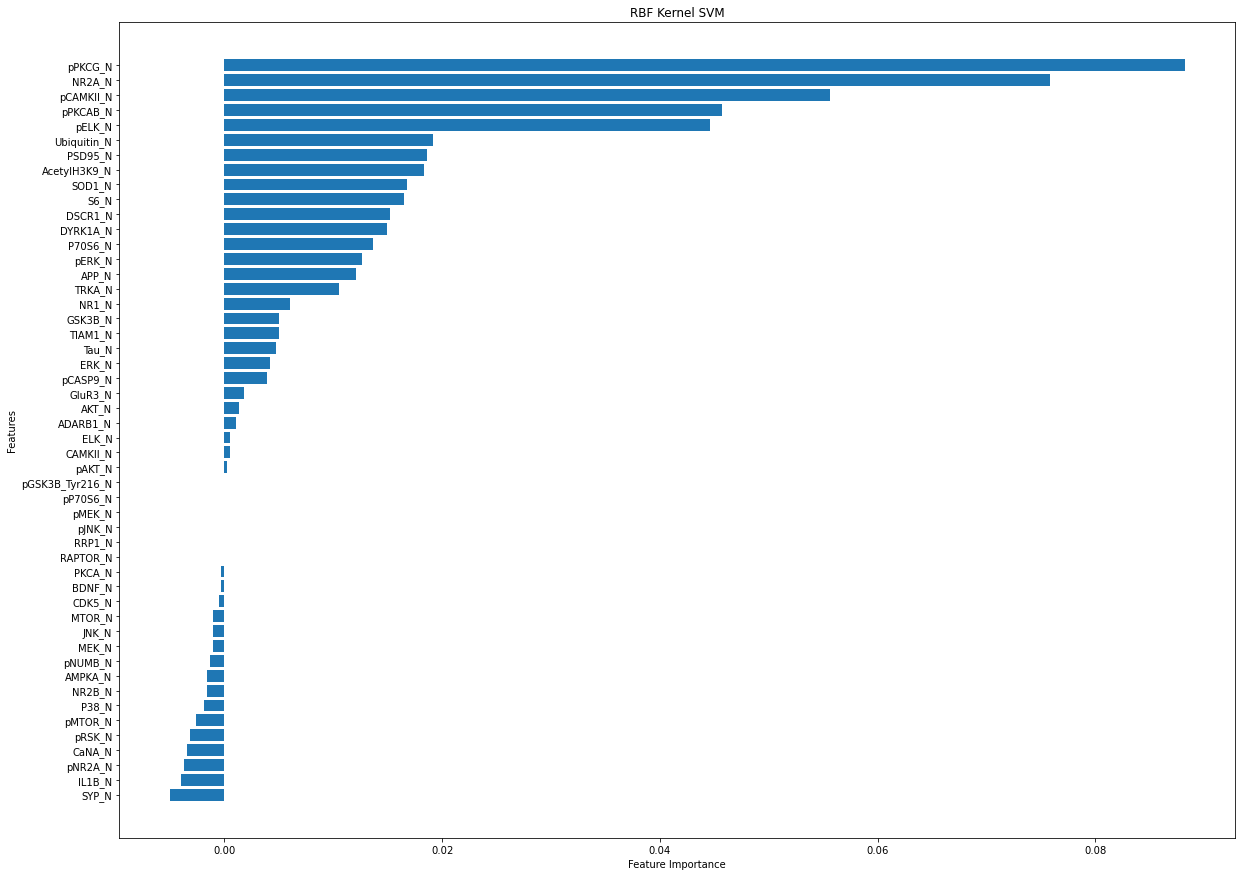

In [91]:
from sklearn.inspection import permutation_importance
%matplotlib inline

svc =  SVC(kernel='rbf')  # rbf kernel model 
svc.fit(X, y_1)   # fit the model

perm_importance = permutation_importance(svc, X, y_1) # gives importance matrix

feature_names = X.columns
features = np.array(feature_names) # convert the columns into array

plt.figure(figsize = (20, 15))
sorted_idx = perm_importance.importances_mean.argsort()    # sort the feature according to their importance
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])  # plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("RBF Kernel SVM")

# c)


Text(0.5, 1.0, 'NN Classifier')

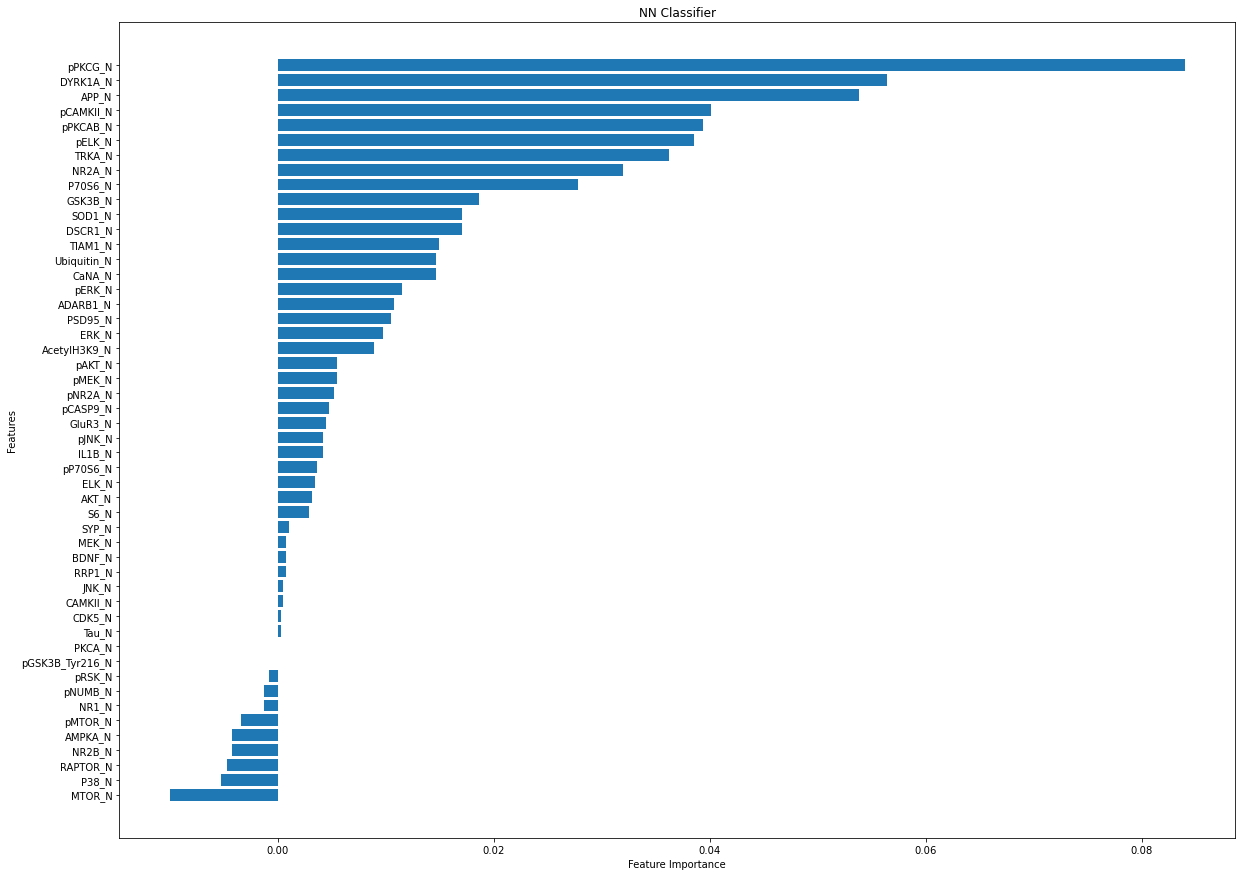

In [92]:
nn = MLPClassifier(activation='relu', solver='adam', random_state=10,max_iter=100)
from sklearn.inspection import permutation_importance
%matplotlib inline

nn = MLPClassifier(activation='relu', solver='adam', random_state=10,max_iter=100)   # NN model 
nn.fit(X, y_1) # Fit model 

perm_importance = permutation_importance(nn, X, y_1)   # same operation as for above model 

feature_names = X.columns
features = np.array(feature_names)

plt.figure(figsize = (20, 15))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("NN Classifier")

## d) Feature importance for random forest

In [93]:
rf = RandomForestClassifier()  # call the model
rf.fit(X, y_1) # fit the model
print(rf.feature_importances_) # feature importance matrix

[0.03139463 0.01163229 0.01067182 0.0160543  0.01970592 0.0153321
 0.01108655 0.01413947 0.00939342 0.00836378 0.00467699 0.01019606
 0.0137846  0.01427451 0.01088359 0.01364783 0.01114381 0.01011783
 0.01366172 0.00679058 0.00640895 0.01739175 0.14379568 0.01357371
 0.02827237 0.03287062 0.02019132 0.01509216 0.02007278 0.01829137
 0.01200688 0.01497374 0.01195422 0.01261375 0.00750387 0.0314313
 0.00978113 0.04265714 0.01667828 0.0390072  0.0144405  0.04932556
 0.04670831 0.01099101 0.01747076 0.01395525 0.02246057 0.01250548
 0.01993229 0.02069024]


Text(0.5, 1.0, 'RF Classifier')

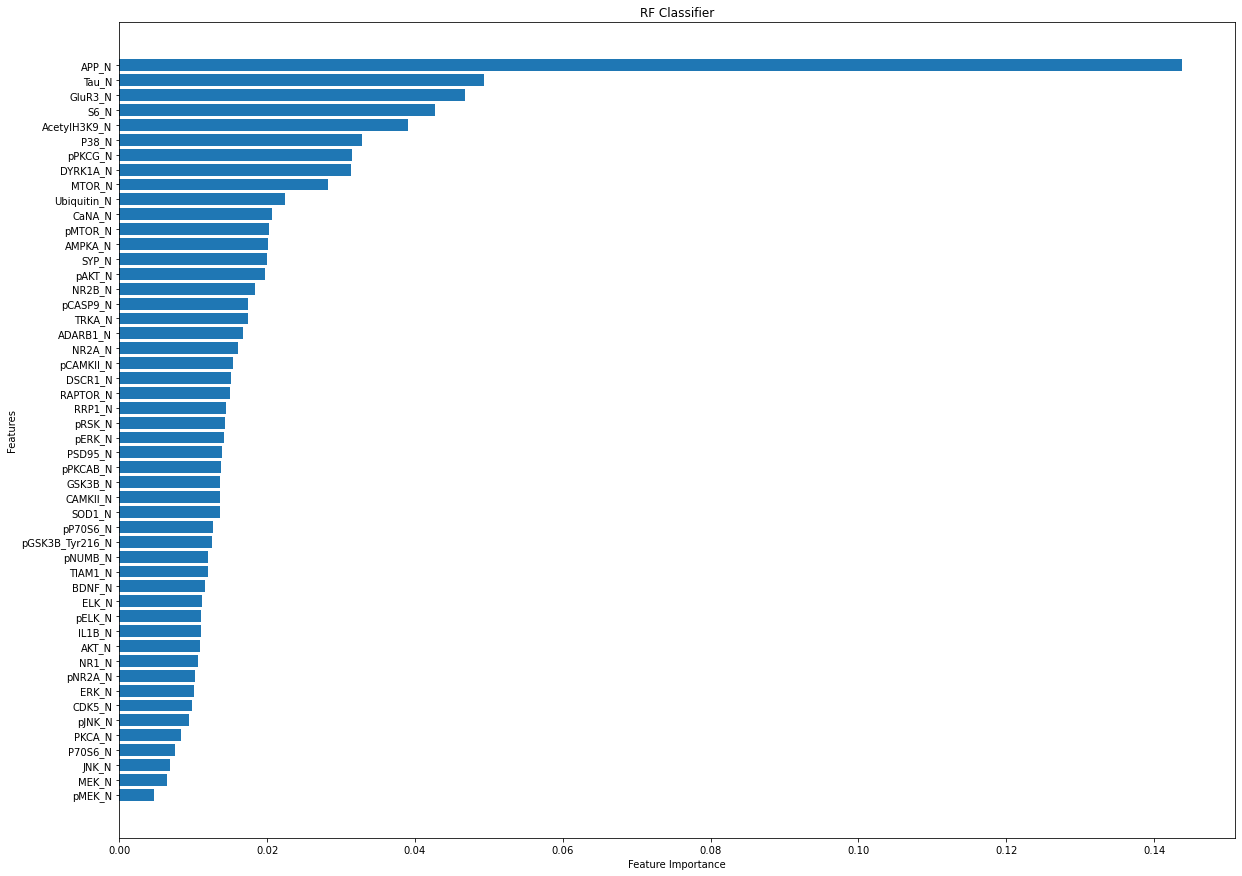

In [94]:
plt.figure(figsize = (20, 15))
sort = rf.feature_importances_.argsort()   # sort the feature matrix
plt.barh(X.columns[sort], rf.feature_importances_[sort]) # plot the result
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("RF Classifier")

From above plot we can see some protiens like {APP_N, TRKA_N, Ubiquitin_N, DRYKIA_N, pPKCG_N etc.} are important for each model.

# Que-7

## Binary Classification

In [95]:
# import relevant library
from sklearn.feature_selection import RFECV

lsvm = LinearSVC()  # initialize the model
rec_fet_cv = RFECV(estimator = lsvm, step = 1, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1, n_jobs = -1)  # call the function and pass the required parameter value
rec_fet_cv.fit(X, y_1)  # fit the model
rec_fet_cv.transform(X)
imp_feat = np.where(rec_fet_cv.support_ == True)[0]  # finds the important feature 
not_imp_feat = np.where(rec_fet_cv.support_ == False)[0] # finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet_cv.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet_cv.support_ == False)[0])


# print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

In [96]:
# testing different models using most important features and optimal hyperpameters obtained above
Xn = X.drop(irrelevant_features, axis = 1)    # feature matrix having only important feature
Xn_train, Xn_test, y_1_train, y_1_test = train_test_split(Xn, y_1, test_size = 0.2, random_state = 81)

############### LINEAR SVM ###############

lsvm = LinearSVC()
# GridSearchCV() object and fitting it with  hyperparameters
reg = [{'C': [5]}]  # optimal hyperparameters value
lsvm_clf = GridSearchCV(lsvm, reg, cv = 5, scoring='accuracy')
lsvm_clf.fit(X_train, y_1_train)

print('**********Linear SVM Classifier**********\n')
print('Reasonable hyperparameter value:', lsvm_clf.best_params_)
print('Score of the model using reasonable hyperparameter:', lsvm_clf.best_score_)

C_opt = lsvm_clf.best_params_
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81)
lsvm_clf_model.fit(Xn_train, y_1_train)
y_1_pred = lsvm_clf_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))
print('\n')

#############  RBF KERNEL SVM ###############

# Building RBF kernel SVM Classifier
param_grid = {'kernel': ['rbf'], 'C': [20], 'gamma': [0.1]}
rbf_k_svm = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, scoring = 'accuracy')
rbf_k_svm.fit(Xn_train, y_1_train)
print('**********RBF KERNEL SVM Classifier**********\n')
print('Reasonable hyperparameter value:', rbf_k_svm.best_params_)
print('Score of the model using above hyperparameter:', rbf_k_svm.best_score_)


C_opt = rbf_k_svm.best_params_
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81)
rbf_k_svm_model.fit(Xn_train, y_1_train)
y_1_pred = rbf_k_svm_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))
print('\n')


##############  NN CLASSIFIER  ############

# Building NN Classifier
param_grid = {'alpha': [0.01], 'hidden_layer_sizes': [(400,)]}
mlp_clf = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)
nn_clf = GridSearchCV(mlp_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
nn_clf.fit(Xn_train, y_1_train)

print('**********NN Classifier**********\n')
print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)


opt_param = nn_clf.best_params_
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)
nn_clf_model.fit(Xn_train, y_1_train)
y_1_pred = nn_clf_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_1_test, y_1_pred))
print('\n')

############ RANDOM FOREST CLASSIFIER #############


# Building Random Forest Classifier
rf = RandomForestClassifier()
param_grid = {'max_depth':[6], 'max_features':[4]}
rf_clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
rf_clf.fit(Xn_train, y_1_train)

print('**********RANDOM FOREST Classifier**********\n')
print('Reasonable hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_

rf_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features'])
rf_clf_model.fit(Xn_train, y_1_train)
y_1_pred = rf_clf_model.predict(Xn_test)
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_1_test, y_1_pred))


**********Linear SVM Classifier**********

Reasonable hyperparameter value: {'C': 5}
Score of the model using reasonable hyperparameter: 0.9589622002438695
The classification report for model:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        98
           1       0.84      0.89      0.87        55

    accuracy                           0.90       153
   macro avg       0.89      0.90      0.89       153
weighted avg       0.90      0.90      0.90       153



**********RBF KERNEL SVM Classifier**********

Reasonable hyperparameter value: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
Score of the model using above hyperparameter: 0.8834710743801653
The classification report for model:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92        98
           1       0.82      0.96      0.88        55

    accuracy                           0.91       153
   macro avg       0.90      0.92 

From above report, removing redundant features and using only relevant features accuracy drops. This might be because of RFE methode removes so many features. Above accuracy we have got only using four features which is good when compared to 50 features. Hence all model perform well.

## Four Class Classification

In [97]:
from sklearn.feature_selection import RFECV
lsvm = LinearSVC()
rec_fet_cv = RFECV(estimator = lsvm, step = 1, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1, n_jobs = -1)
rec_fet_cv.fit(X, y_2)
rec_fet_cv.transform(X)
imp_feat = np.where(rec_fet_cv.support_ == True)[0]
not_imp_feat = np.where(rec_fet_cv.support_ == False)[0]
print(); print('Optimal Number of features:{}'.format(rec_fet_cv.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet_cv.support_ == False)[0])

relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.

Optimal Number of features:35

Features which can be removed: [ 0  2  3  5  6 10 17 19 25 28 31 35 38 44 45]
Most important features:
 ['BDNF_N', 'pAKT_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'CAMKII_N', 'ELK_N', 'GSK3B_N', 'MEK_N', 'TRKA_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'pMTOR_N', 'DSCR1_N', 'NR2B_N', 'pNUMB_N', 'TIAM1_N', 'pP70S6_N', 'P70S6_N', 'CDK5_N', 'S6_N', 'AcetylH3K9_N', 'RRP1_N', 'Tau_N', 'GluR3_N', 'IL1B_N', 

In [123]:
# testing different models using most important features and optimal hyperpameters obtained above
Xn = X.drop(irrelevant_features, axis = 1)
Xn_train, Xn_test, y_2_train, y_2_test = train_test_split(Xn, y_2, test_size = 0.2, random_state = 81)

############### LINEAR SVM ###############

lsvm = LinearSVC()
# GridSearchCV() object and fitting it with hyperparameters
reg = [{'C': [40]}]
lsvm_clf = GridSearchCV(lsvm, reg, cv = 5, scoring='accuracy')
lsvm_clf.fit(X_train, y_1_train)

print('**********Linear SVM Classifier**********\n')
print('Reasonable hyperparameter value:', lsvm_clf.best_params_)
print('Score of the model using reasonable hyperparameter:', lsvm_clf.best_score_)

C_opt = lsvm_clf.best_params_
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81)
lsvm_clf_model.fit(Xn_train, y_2_train)
y_2_pred = lsvm_clf_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))
print('\n')

#############  RBF KERNEL SVM ###############

# Building RBF kernel SVM Classifier
param_grid = {'kernel': ['rbf'], 'C': [20], 'gamma': [0.1]}
rbf_k_svm = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, scoring = 'accuracy')
rbf_k_svm.fit(Xn_train, y_2_train)
print('**********RBF KERNEL SVM Classifier**********\n')
print('Reasonable hyperparameter value:', rbf_k_svm.best_params_)
print('Score of the model using above hyperparameter:', rbf_k_svm.best_score_)


C_opt = rbf_k_svm.best_params_
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81)
rbf_k_svm_model.fit(Xn_train, y_1_train)
y_2_pred = rbf_k_svm_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))
print('\n')


##############  NN CLASSIFIER  ############

# Building NN Classifier
param_grid = {'alpha': [0.01], 'hidden_layer_sizes': [(400,)]}
mlp_clf = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)
nn_clf = GridSearchCV(mlp_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
nn_clf.fit(Xn_train, y_2_train)

print('**********NN Classifier**********\n')
print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)


opt_param = nn_clf.best_params_
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)
nn_clf_model.fit(Xn_train, y_2_train)
y_2_pred = nn_clf_model.predict(Xn_test)
print('The classification report for model:\n', classification_report(y_2_test, y_2_pred))
print('\n')

############ RANDOM FOREST CLASSIFIER #############
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier()
rec_fet_cv = RFECV(estimator = rf, step = 1, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1, n_jobs = -1)
rec_fet_cv.fit(X, y_2)
rec_fet_cv.transform(X)
imp_feat = np.where(rec_fet_cv.support_ == True)[0]
not_imp_feat = np.where(rec_fet_cv.support_ == False)[0]
print(); print('Optimal Number of features:{}'.format(rec_fet_cv.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet_cv.support_ == False)[0])

relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')

# Building Random Forest Classifier
rf = RandomForestClassifier()
param_grid = {'max_depth':[6], 'max_features':[4]}
rf_clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
rf_clf.fit(Xn_train, y_2_train)

print('**********RANDOM FOREST Classifier**********\n')
print('Reasonable hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_

rf_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features'])
rf_clf_model.fit(Xn_train, y_2_train)
y_2_pred = rf_clf_model.predict(Xn_test)
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_2_test, y_2_pred))


**********Linear SVM Classifier**********

Reasonable hyperparameter value: {'C': 40}
Score of the model using reasonable hyperparameter: 0.9458474461455086
The classification report for model:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       1.00      1.00      1.00        42
           2       0.79      0.79      0.79        34
           3       1.00      1.00      1.00        34

    accuracy                           0.91       153
   macro avg       0.91      0.91      0.91       153
weighted avg       0.91      0.91      0.91       153



**********RBF KERNEL SVM Classifier**********

Reasonable hyperparameter value: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
Score of the model using above hyperparameter: 0.9556564151199025
The classification report for model:
               precision    recall  f1-score   support

           0       0.31      0.67      0.42        43
           1       0.28      0.38 

Models with four Class Classifiaction give better performance after removing redundant features and using most important features.

# Que-8

From the results, we have got above for different model, we found that Random Forest classifier and RBF kernel SVM classifier give better accuracy than other model. Hence we test these two model.

In [99]:
# Load Test data
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv"
df4 = pd.read_csv(url)  # convert into data frame
X_Test = df4.drop(['Genotype', 'Treatment_Behavior'], axis = 1)  # drop the target columns

y_1_Test = df4['Genotype'] 
y_2_Test = df4['Treatment_Behavior']

In [100]:
relev_feat = df3.columns   # gives relevant feature from dataframe 3 having 50 features 
test_data_feat = X_Test.columns  # test data having all features 
print('Relevant features:\n', relev_feat)
print('Test data features:\n', test_data_feat)

X_Test1 = X_Test.drop(relev_feat, axis = 1)   # dropped relevant features in test data
irrelev_feat = X_Test1.columns         # gives irrelevant Test data features
print('Irrelavent feat:\n',irrelev_feat)

# now dropping irrelavent features from the test data
X_Test_new = X_Test.drop(irrelev_feat, axis = 1)


Relevant features:
 Index(['DYRK1A_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pCAMKII_N',
       'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR2A_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'CAMKII_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N',
       'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N',
       'pP70S6_N', 'P70S6_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N',
       'AcetylH3K9_N', 'RRP1_N', 'Tau_N', 'GluR3_N', 'IL1B_N', 'pCASP9_N',
       'PSD95_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SYP_N', 'CaNA_N'],
      dtype='object')
Test data features:
 Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', '

In [101]:
X_Test_new     # final test data having only necessary(relevant) features

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pERK_N,pJNK_N,PKCA_N,...,RRP1_N,Tau_N,GluR3_N,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,CaNA_N
0,0.627582,0.446958,2.930717,5.915039,0.197897,1.765115,1.808111,1.022813,0.348667,0.348291,...,0.150501,0.353719,0.220791,0.571351,1.788785,2.221383,1.180117,0.833704,0.541241,1.649983
1,0.651253,0.464964,2.992689,5.975028,0.202810,1.807824,1.960691,1.053551,0.353874,0.362704,...,0.158657,0.343087,0.215580,0.569082,1.763879,2.215774,1.066127,0.838388,0.525966,1.638988
2,0.644346,0.470056,3.073847,5.927379,0.205131,1.783552,2.147883,1.025842,0.361690,0.368386,...,0.168043,0.335484,0.200900,0.537034,1.672823,2.098199,1.063393,0.806386,0.508214,1.564925
3,0.568229,0.393465,2.606780,5.808102,0.218211,2.312324,1.733692,0.906988,0.337290,0.335699,...,0.156875,0.292974,0.207313,0.571438,1.651346,2.207185,1.291057,0.844211,0.561721,1.682222
4,0.587038,0.411203,2.757975,6.006657,0.223688,2.375283,1.843255,0.917357,0.348531,0.354685,...,0.166624,0.301951,0.207108,0.559934,1.629055,2.212114,1.157121,0.854093,0.534845,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.248694,1.460666,1.860128,0.188536,2.178982,0.770115,0.260785,0.234513,0.222421,...,0.181807,0.268631,0.231247,0.586215,1.395397,2.006332,1.156113,0.853264,0.400268,1.160740
221,0.261107,0.276658,1.674129,2.256494,0.218216,2.475735,0.913363,0.270506,0.264183,0.259228,...,0.173294,0.266825,0.224332,0.581128,1.398220,1.918932,1.124036,0.837864,0.407596,1.139347
222,0.216134,0.241693,1.330831,1.737540,0.197125,1.919489,0.720767,0.223642,0.223802,0.236581,...,0.197777,0.249543,0.230207,0.571559,1.323386,1.919458,1.174635,0.839982,0.431334,1.142205
223,0.212369,0.239036,1.346827,1.814940,0.194538,1.908112,0.772530,0.230361,0.222490,0.215904,...,0.206053,0.251976,0.234829,0.594155,1.344565,1.874310,1.157447,0.837781,0.395408,1.112718


In [102]:
print('Total null value in Test data:', X_Test_new.isna().sum().sum())  # checking null values in test data

Total null value in Test data: 0


In [103]:
# Encoding the target variables as 0,1,2,3
y_1_Test = y_1_Test.replace({'Control':0, 'Ts65Dn':1}) 
y_2_Test = y_2_Test.replace({'Memantine_C/S':0, 'Memantine_S/C':1, 'Saline_C/S':2, 'Saline_S/C':3})


###  RBF kernel SVM

In [104]:
# binary classification
rbf_k_svm_model.fit(X_train, y_1_train)  # fit the model
y_1_pred = rbf_k_svm_model.predict(X_Test_new) # prediction by model
print('The Binary class classification report for RBF Kernel SVM Model:\n', classification_report(y_1_Test, y_1_pred)) # report

# four class classification
rbf_k_svm_model.fit(X_train, y_2_train) # fit the model
y_2_pred = rbf_k_svm_model.predict(X_Test_new)  # prediction by model
print('The Four class classification report for RBF Kernel SVM Model:\n', classification_report(y_1_Test, y_2_pred)) # report

The Binary class classification report for RBF Kernel SVM Model:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       135
           1       0.78      0.84      0.81        90

    accuracy                           0.84       225
   macro avg       0.83      0.84      0.84       225
weighted avg       0.84      0.84      0.84       225

The Four class classification report for RBF Kernel SVM Model:
               precision    recall  f1-score   support

           0       0.54      0.20      0.29       135
           1       0.20      0.16      0.17        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.18       225
   macro avg       0.18      0.09      0.12       225
weighted avg       0.40      0.18      0.24       225



### Random Forest

In [105]:
# binary classification
rf_clf_model.fit(X_train, y_1_train) # fit the model
y_1_pred = rf_clf_model.predict(X_Test_new) # prediction by model
print('The Binary class classification report for RF Model:\n', classification_report(y_1_Test, y_1_pred)) # report

# four class classification
rf_clf_model.fit(X_train, y_2_train) # fit the model
y_2_pred = rf_clf_model.predict(X_Test_new) # prediction by model
print('The Four class classification report for RF Model:\n', classification_report(y_1_Test, y_2_pred)) # report

The Binary class classification report for RF Model:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       135
           1       0.72      0.68      0.70        90

    accuracy                           0.76       225
   macro avg       0.76      0.75      0.75       225
weighted avg       0.76      0.76      0.76       225

The Four class classification report for RF Model:
               precision    recall  f1-score   support

           0       0.72      0.32      0.44       135
           1       0.24      0.16      0.19        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.25       225
   macro avg       0.24      0.12      0.16       225
weighted avg       0.52      0.25      0.34       225



# Analysis of Pre-Trained NN to Extract Domain Specific Features

# Que-9

In [106]:
# importing relevant libraries

from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()

In [107]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'D:\EE1Sem2 Course\EE769 IML\Assignment2\hymenoptera_data1\hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

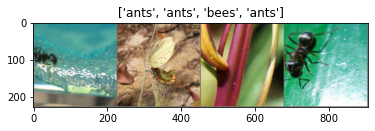

In [108]:
#Visualize a few images

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Now, let’s write a general function to train a model. Here, we will illustrate:

Scheduling the learning rate

Saving the best model

In [109]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [110]:
# Visualizing the model predictions

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [111]:
# Finetuning the convnet
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

In [112]:
print('Total number of features:',num_ftrs)

Total number of features: 512


Therefore above code run successfully.

# Que-10

In [113]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms

def extract_resnet_features(image):            # function to extract ResNet18 features
                          
    resnet = models.resnet18(pretrained=True)  # Load ResNet18 model

    # Remove the last layer (the fully connected layer)
    modules = list(resnet.children())[:-1]     
    resnet = torch.nn.Sequential(*modules)

    
    resnet.eval()   # Set the model to evaluation mode

    # Apply transformations to the input image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image)

    
    image_tensor = image_tensor.unsqueeze(0)    # Add a batch dimension to the input image

    # Pass the input image through the model to obtain the feature vector
    with torch.no_grad():
        features = resnet(image_tensor)

    # Remove the batch dimension and flatten the feature vector
    features = features.squeeze()
    features = torch.flatten(features)

    
    return features.numpy()    # Return the feature vector


In [114]:
import numpy as np
from torchvision import datasets

# Load the training dataset
data_path = 'D:\EE1Sem2 Course\EE769 IML\Assignment2\hymenoptera_data1\hymenoptera_data'
image_datasets = datasets.ImageFolder(data_path)

# Extract ResNet18 features for all training images
features_list = []
for i in range(len(image_datasets)):
    image, _ = image_datasets[i]
    features = extract_resnet_features(image)
    features_list.append(features)

# Convert the list of feature vectors to a numpy array
features_array = np.vstack(features_list)


In [115]:
print(features_array)   # gives feature matrix
print(features_array.shape)
print(type(features_array))
print(len(image_datasets))

[[7.4373430e-01 4.8474604e-01 1.4903584e+00 ... 6.1073780e-01
  3.0619392e-01 7.3325582e-02]
 [6.7332500e-01 2.3460921e-02 5.3680990e-02 ... 8.2561678e-01
  2.4645912e-04 9.7731102e-01]
 [1.6275308e-01 5.4521888e-01 2.4590825e-01 ... 1.4100443e+00
  4.4878516e-01 1.0860368e+00]
 ...
 [5.4420609e-02 5.8906978e-01 7.6077455e-01 ... 1.7515126e-01
  4.1209885e-01 2.1623483e-01]
 [1.4415629e-01 7.0744067e-01 6.7015755e-01 ... 1.8408527e+00
  7.1286052e-01 1.2745625e+00]
 [1.1796068e-01 2.5036803e-02 2.0088584e+00 ... 4.2496538e+00
  5.9333020e-01 6.5280877e-02]]
(397, 512)
<class 'numpy.ndarray'>
397


# Que-11

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

print("Best hyperparameters for L2 regularized logistic regression:", grid_lr.best_params_)



from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

print("Best hyperparameters for RBF kernel SVM:", grid_svm.best_params_)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 50, 100, 500],
}

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("Best hyperparameters for random forest:", grid_rf.best_params_)


from sklearn.metrics import accuracy_score, f1_score

lr_best = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)
lr_best.fit(X_train, y_train)
lr_y_pred = lr_best.predict(X_test)

svm_best = SVC(kernel='rbf', C=100, gamma=0.1, random_state=42)
svm_best.fit(X_train, y_train)
svm_y_pred = svm_best.predict(X_test)

rf_best = RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)
rf_best.fit(X_train, y_train)
rf_y_pred = rf_best.predict(X_test)

print("Accuracy and F1 score for L2 regularized logistic regression:", accuracy_score


NameError: name 'y_train' is not defined

From above we have got an 397x512 dimensional array. So number of samples N = 397

# Que-12

### Learning Outcomes

1. Learned about dataframe(how to read, write, add, delete row and columns) by solving queston 1.
2. By solving que 2, i learned about useful feature in data set and how to perform exploratory data analysis. 
3. In que 3, got the idea about how to deal with missing values in data set.
4. In que 4, understood different evaluation matrix to judge the model performance
5. In que 5, learned about hyperparameter tuning for different classification model using GridSearchCV from scikit-learn library, got to know about K-fold cross validation. Calculated optimal hyperparameter for all given mmodel and found accuracy from classification report and compared the performance of different calssification model. RBF Kernel and Random forest perform excellent.
6. In que 6, got to learn about feature importance for each model and how to find them.
7. Que 7, Learned about recursive feature elimination and how to find best number of features which improve model performance, among all features.
8. Finaly tested RBF kernel SVM and Random Forest Classifier and which gives high accuracy by solving que 8.
9. Read about Pytorch and got to learn how to install it and run it and learned about ConvNet as fixed feature extractor. Run the feature extracter code and it runs successfully.
10. In next que got the idea about ResNet18 features for a given input image and finally tested the different model with test data. So overall i learned binary and multiple class classification, different models performance, which model to select for different classification task. 

### References:


Que2:

https://www.youtube.com/watch?v=FndwYNcVe0U&t=129s

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
      
https://www.youtube.com/watch?v=yFmLnMdZQF0
      
Que3: 

https://scikit-learn.org/stable/modules/impute.html

https://www.youtube.com/watch?v=a38ehxv3kyk&t=1s

Que4:

https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

Que5:

Discussed with 22m1087,22m1086,22D0546 

https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
      
https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
      
https://www.youtube.com/watch?v=4Im0CT43QxY
      
https://www.youtube.com/watch?v=HdlDYng8g9s&t=353s
      
Que6: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://www.youtube.com/watch?v=IhSWvwmpwTU&t=88s
      
Que7: 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
      
https://www.youtube.com/watch?v=IQJzU0-gKlM
      
Que9: 

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

Que10:

Discussed with 22D0546

https://chat.openai.com/chat

https://chat.openai.com/chat

